In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import numpy as np
import umap

# Algoritmos de reducción de dimensionalidad
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

# Algoritmos clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.spatial.distance import cdist

In [200]:
file_path = 'SmartFarmingCropYield.csv'

dataset = pd.read_csv(file_path)

# Análisis exploratorio de datos (EDA)

In [201]:
#Creamos copia del dataset original
df = dataset.copy()

#Renombramos las columnas para que no comiencen con un espacio
df.columns = df.columns.str.strip().str.replace(" ", "")

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
2,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,Goteo,Mixto,15.26,144,2931.16,0.80,Leve
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,Aspersor,Inorganico,45.43,93,4503.82,0.88,Leve
307,Trigo,28.81,7.46,30.56,245.13,45.32,8.47,NaN,Mixto,16.58,128,4203.51,0.65,Severo
308,Soja,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organico,5.05,104,3708.54,0.85,Severo
309,Soja,38.61,6.20,17.08,279.06,73.09,9.60,Goteo,Organico,43.78,131,2586.36,0.77,Severo


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tipoCultivo                311 non-null    object 
 1   humedadSuelo(%)            311 non-null    float64
 2   pHSuelo                    311 non-null    float64
 3   temperatura(°C)            311 non-null    float64
 4   precipitacion(mm)          311 non-null    float64
 5   humedad(%)                 311 non-null    float64
 6   horasLuzSolar              311 non-null    float64
 7   tipoRiego                  220 non-null    object 
 8   tipoFertilizante           311 non-null    object 
 9   mlPesticida                311 non-null    float64
 10  diasTotales                311 non-null    int64  
 11  rendimientoKg_hectarea     311 non-null    float64
 12  indiceNDVI                 311 non-null    float64
 13  estadoEnfermedadesCultivo  228 non-null    object 

**Valores faltantes o duplicados**

In [203]:
df.duplicated().values.any()


False

In [204]:
df.isna().sum()

tipoCultivo                   0
humedadSuelo(%)               0
pHSuelo                       0
temperatura(°C)               0
precipitacion(mm)             0
humedad(%)                    0
horasLuzSolar                 0
tipoRiego                    91
tipoFertilizante              0
mlPesticida                   0
diasTotales                   0
rendimientoKg_hectarea        0
indiceNDVI                    0
estadoEnfermedadesCultivo    83
dtype: int64

In [205]:
df[df.isna().any(axis=1)]

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN
8,Maiz,42.43,7.07,20.70,224.15,76.53,8.70,NaN,Organico,13.55,127,4942.95,0.65,Leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Soja,40.46,7.44,18.31,237.68,59.21,8.68,NaN,Mixto,17.22,100,4287.59,0.77,Severo
305,Soja,19.06,7.20,20.93,117.13,45.96,5.34,Aspersor,Inorganico,6.76,149,2531.89,0.79,NaN
307,Trigo,28.81,7.46,30.56,245.13,45.32,8.47,NaN,Mixto,16.58,128,4203.51,0.65,Severo
308,Soja,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organico,5.05,104,3708.54,0.85,Severo


In [206]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,Goteo,Mixto,15.26,144,2931.16,0.80,Leve
1,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,Aspersor,Mixto,47.61,121,5264.09,0.70,Leve
2,Soja,40.54,6.35,19.24,184.82,76.50,5.21,Manual,Inorganico,49.78,118,5598.46,0.50,Leve
3,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,Goteo,Organico,23.12,145,2437.08,0.55,Moderate
4,Soja,12.80,5.87,26.90,218.80,51.76,4.72,Aspersor,Mixto,31.75,116,4629.49,0.42,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,Manual,Mixto,35.50,128,5528.08,0.31,Leve
159,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,Goteo,Inorganico,45.16,112,2023.56,0.30,Leve
160,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,Aspersor,Organico,20.13,122,3708.29,0.47,Moderate
161,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,Aspersor,Inorganico,45.43,93,4503.82,0.88,Leve


**Distrubuciones de las variables**

In [207]:
#Selección de columnas númericas
cols = ['humedadSuelo(%)', 'pHSuelo', 'temperatura(°C)','precipitacion(mm)', 'humedad(%)', 'horasLuzSolar', 
'mlPesticida', 'diasTotales', 'rendimientoKg_hectarea', 'indiceNDVI']

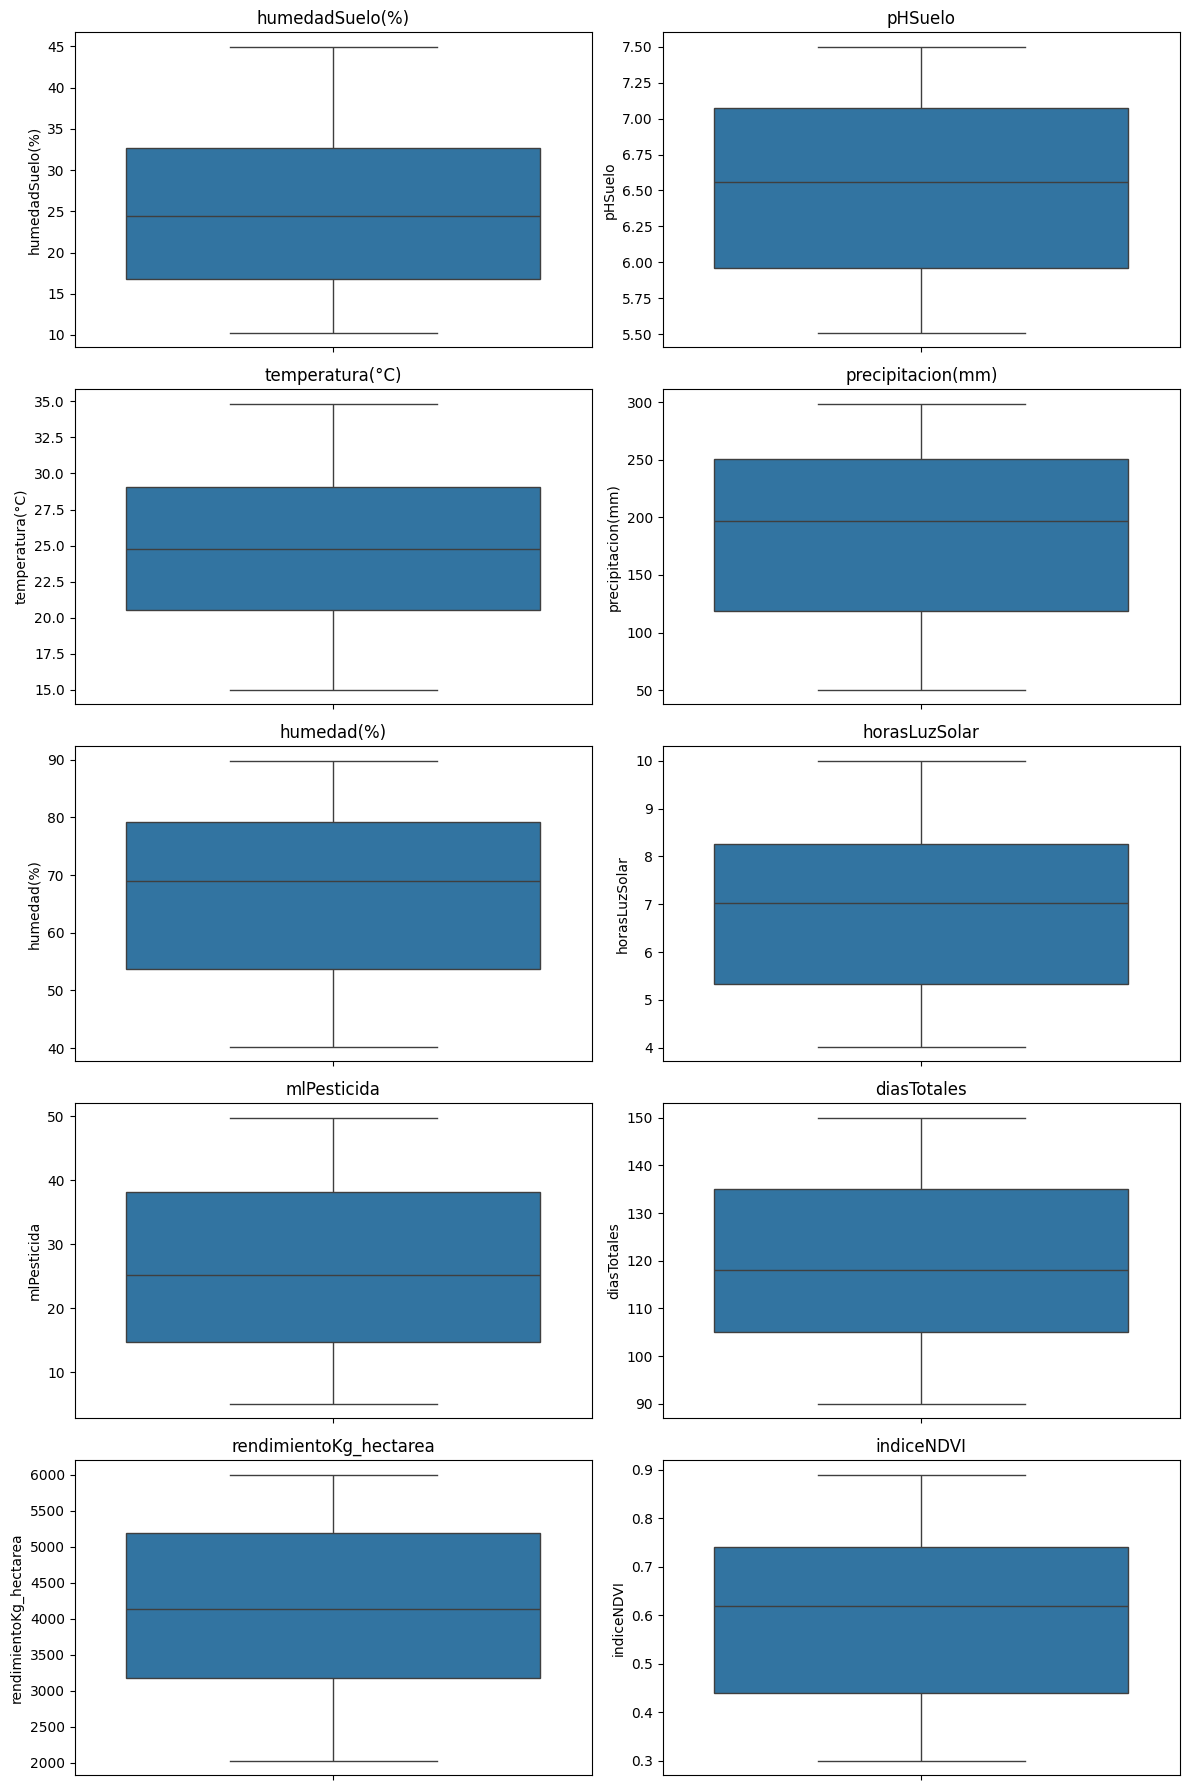

In [208]:
# Definimos el layout → 5 filas x 2 columnas = 10 subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

# Aplanamos la grilla de ejes
axes = axes.flatten()

# Iteramos
for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Ajustamos diseño
plt.tight_layout()
plt.show()

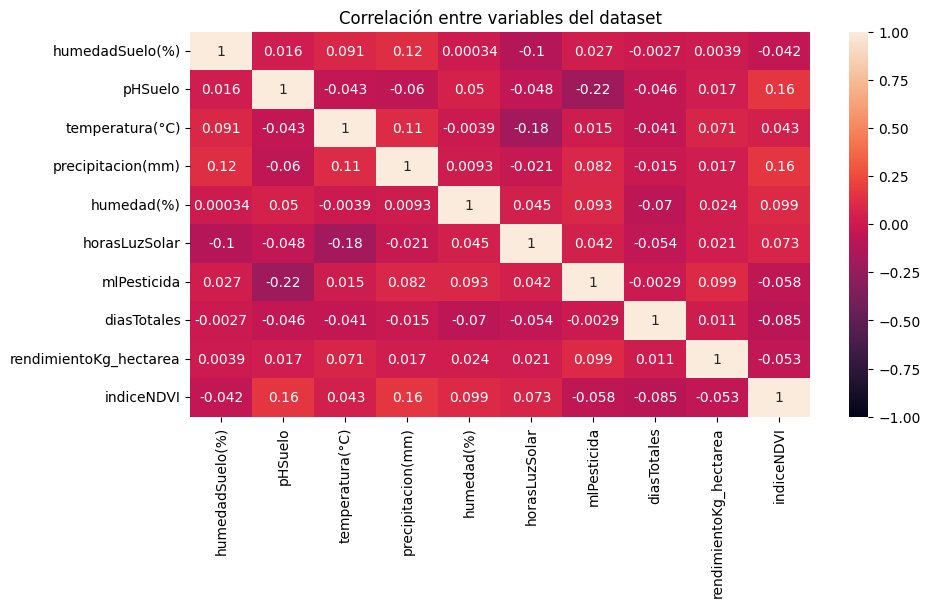

In [209]:
#Selección de columnas númericas
cols = ['humedadSuelo(%)', 'pHSuelo', 'temperatura(°C)','precipitacion(mm)', 'humedad(%)', 'horasLuzSolar', 
'mlPesticida', 'diasTotales', 'rendimientoKg_hectarea', 'indiceNDVI']

plt.figure(figsize=(10,5))
sns.heatmap(df[cols].corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlación entre variables del dataset')
plt.show()

**Codificación de variables catgorícas**

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tipoCultivo                163 non-null    object 
 1   humedadSuelo(%)            163 non-null    float64
 2   pHSuelo                    163 non-null    float64
 3   temperatura(°C)            163 non-null    float64
 4   precipitacion(mm)          163 non-null    float64
 5   humedad(%)                 163 non-null    float64
 6   horasLuzSolar              163 non-null    float64
 7   tipoRiego                  163 non-null    object 
 8   tipoFertilizante           163 non-null    object 
 9   mlPesticida                163 non-null    float64
 10  diasTotales                163 non-null    int64  
 11  rendimientoKg_hectarea     163 non-null    float64
 12  indiceNDVI                 163 non-null    float64
 13  estadoEnfermedadesCultivo  163 non-null    object 

In [211]:
df = pd.get_dummies(data=df, columns=['tipoRiego', 'tipoFertilizante', 'estadoEnfermedadesCultivo'], drop_first=True)

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo
0,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,15.26,144,2931.16,0.80,True,False,True,False,False,False
1,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,47.61,121,5264.09,0.70,False,False,True,False,False,False
2,Soja,40.54,6.35,19.24,184.82,76.50,5.21,49.78,118,5598.46,0.50,False,True,False,False,False,False
3,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,23.12,145,2437.08,0.55,True,False,False,True,True,False
4,Soja,12.80,5.87,26.90,218.80,51.76,4.72,31.75,116,4629.49,0.42,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,35.50,128,5528.08,0.31,False,True,True,False,False,False
159,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,45.16,112,2023.56,0.30,True,False,False,False,False,False
160,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,20.13,122,3708.29,0.47,False,False,False,True,True,False
161,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,45.43,93,4503.82,0.88,False,False,False,False,False,False


In [212]:
df['mas_120_dias'] = df['diasTotales'].apply(lambda x: True if x > 120 else False)
df.drop(columns='diasTotales', inplace=True)

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,mas_120_dias
0,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,15.26,2931.16,0.80,True,False,True,False,False,False,True
1,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,47.61,5264.09,0.70,False,False,True,False,False,False,True
2,Soja,40.54,6.35,19.24,184.82,76.50,5.21,49.78,5598.46,0.50,False,True,False,False,False,False,False
3,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,23.12,2437.08,0.55,True,False,False,True,True,False,True
4,Soja,12.80,5.87,26.90,218.80,51.76,4.72,31.75,4629.49,0.42,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,35.50,5528.08,0.31,False,True,True,False,False,False,True
159,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,45.16,2023.56,0.30,True,False,False,False,False,False,False
160,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,20.13,3708.29,0.47,False,False,False,True,True,False,True
161,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,45.43,4503.82,0.88,False,False,False,False,False,False,False


**Normalización de las variables**

In [213]:
X = df.drop(columns=['tipoCultivo'])
y = df['tipoCultivo']

scaler = StandardScaler().set_output(transform="pandas")
df_escalado = scaler.fit_transform(X)
df_escalado

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,mas_120_dias
0,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,-1.060408,1.132157,1.525297,-0.733305,1.420746,-0.694131,-0.694131,-0.684448,1.069924
1,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.961703,0.569187,-0.655610,-0.733305,1.420746,-0.694131,-0.694131,-0.684448,1.069924
2,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,1.251525,-0.556753,-0.655610,1.363690,-0.703856,-0.694131,-0.694131,-0.684448,-0.934646
3,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,-1.488661,-0.275268,1.525297,-0.733305,-0.703856,1.440650,1.440650,-0.684448,1.069924
4,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,0.411652,-1.007130,-0.655610,-0.733305,1.420746,-0.694131,1.440650,-0.684448,-0.934646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.392030,0.302156,1.533782,-1.247039,1.453092,-0.361201,0.692032,1.190522,-1.626397,-0.655610,1.363690,1.420746,-0.694131,-0.694131,-0.684448,1.069924
159,0.154561,-0.814210,-1.894692,0.306484,-0.529829,1.462461,1.407924,-1.847087,-1.682694,1.525297,-0.733305,-0.703856,-0.694131,-0.694131,-0.684448,-0.934646
160,0.618569,-1.388809,-1.706883,-0.448952,-0.842507,0.470845,-0.447022,-0.386816,-0.725645,-0.655610,-0.733305,-0.703856,1.440650,1.440650,-0.684448,1.069924
161,0.674210,1.500607,-0.658602,1.370331,1.228624,-0.794321,1.427933,0.302725,1.582534,-0.655610,-0.733305,-0.703856,-0.694131,-0.694131,-0.684448,-0.934646


# PCA

In [214]:
# Obtener todas las componentes principales
pca = PCA(n_components=X.shape[1])

pca_features = pca.fit_transform(df_escalado)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
             'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16' ])
pca_df['tipoCultivo'] = y

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,tipoCultivo
0,-0.068315,-0.430961,2.448585,0.453308,0.778546,-0.079128,-1.411301,0.213420,1.245448,0.277594,0.053400,1.255125,-0.947609,-0.145656,0.614417,-0.371073,Trigo
1,0.959151,0.744856,0.500574,-1.467113,1.723245,1.368822,0.272948,0.886305,1.089267,0.620799,-1.222328,-0.478189,0.494090,-0.876869,-0.194026,-1.174045,Maiz
2,1.174755,1.036803,-1.254872,-0.277938,0.499558,0.875947,0.908315,-0.935845,-0.641523,2.143201,0.111406,-1.156677,0.519555,-1.225925,0.222888,0.209024,Soja
3,-2.349818,-1.389282,-0.859643,-0.040962,-0.202887,-0.023863,-0.727274,1.701050,0.814356,-0.045609,0.134839,0.551898,-0.767000,0.610383,0.386530,0.399999,Trigo
4,0.977342,-1.927715,-0.310204,-1.930395,1.191368,-0.479648,0.720434,-0.087239,-0.419969,-0.951837,-0.567308,-1.108337,0.236096,0.616035,-0.269047,-0.592613,Soja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1.989092,0.940769,-0.203972,-1.189106,-0.576969,-0.113469,2.352749,0.486844,0.094168,0.827523,0.174285,1.066409,-1.378714,-0.320266,1.128849,-0.516197,Maiz
159,-2.028187,-0.451778,-0.130169,-1.889532,0.120233,1.032335,-2.187671,-0.779432,-1.486649,1.264580,0.721080,-0.722740,-0.905222,-0.662839,0.395700,0.188272,Maiz
160,-1.074850,-1.057926,-2.315932,-0.497614,-1.032655,-0.040340,-1.294190,0.207822,0.241152,0.355028,-1.240296,0.466718,0.573688,-0.057548,-0.904269,-0.835939,Trigo
161,0.201653,0.484339,0.985710,1.645693,1.595212,1.111281,0.406271,0.040438,0.215286,1.400133,0.534760,-1.700272,0.060210,-1.151800,-0.872823,-0.620387,Maiz


In [215]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PC1          163 non-null    float64
 1   PC2          163 non-null    float64
 2   PC3          163 non-null    float64
 3   PC4          163 non-null    float64
 4   PC5          163 non-null    float64
 5   PC6          163 non-null    float64
 6   PC7          163 non-null    float64
 7   PC8          163 non-null    float64
 8   PC9          163 non-null    float64
 9   PC10         163 non-null    float64
 10  PC11         163 non-null    float64
 11  PC12         163 non-null    float64
 12  PC13         163 non-null    float64
 13  PC14         163 non-null    float64
 14  PC15         163 non-null    float64
 15  PC16         163 non-null    float64
 16  tipoCultivo  163 non-null    object 
dtypes: float64(16), object(1)
memory usage: 21.8+ KB


componentes principales?

In [216]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [217]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_,
                        'Proporción de variancia explicada':pca.explained_variance_ratio_,
                        'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.736272,0.107851,0.107851
1,1.647325,0.102326,0.210177
2,1.536375,0.095434,0.305612
3,1.266016,0.078641,0.384252
4,1.252107,0.077777,0.462029
5,1.195375,0.074253,0.536282
6,1.038544,0.064511,0.600792
7,1.002932,0.062299,0.663091
8,0.969880,0.060246,0.723337
9,0.946158,0.058772,0.782109


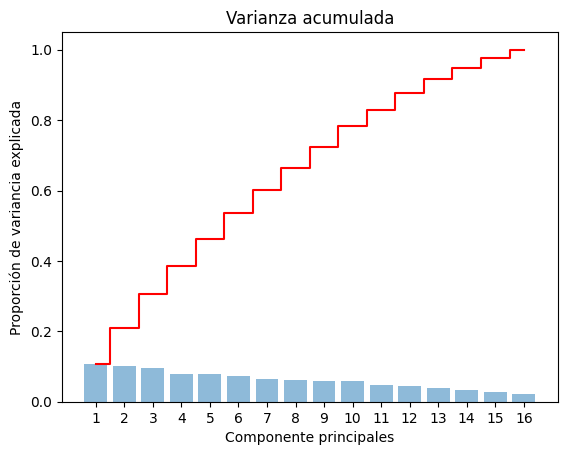

In [218]:
plt.bar(range(1,17), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,17), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.title('Varianza acumulada')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.xticks([x for x in range(1,17,1)])
plt.show()

In [219]:
pca_filtrado = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'tipoCultivo']]

In [220]:
features = pca_filtrado.drop(columns=['tipoCultivo']).columns.to_list()

unique_tipoCultivo = pca_filtrado['tipoCultivo'].unique()
num_colors = len(unique_tipoCultivo)
color_palette = plt.get_cmap('tab20', num_colors)

tipoCultivo_color_map = {cultivo: mcolors.to_hex(color_palette(i)) for i,
                       cultivo in enumerate(unique_tipoCultivo)}

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_filtrado["tipoCultivo"],
                 labels={'color': 'tipoCultivo'},
                 color_discrete_map=tipoCultivo_color_map,
                 title="Distribución de tipoCultivo en 2 dimensiones")

fig.show()

explicacion

# ISOMAP

In [221]:
isomap = Isomap(n_neighbors=50, n_components=2)
X_reduced = isomap.fit_transform(df_escalado)

df_isomap = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_isomap['tipoCultivo'] = y

df_isomap

,PC1,PC2,tipoCultivo
0,-0.348951,-1.424291,Trigo
1,1.819827,-1.201247,Maiz
2,2.699991,0.024737,Soja
3,-3.924922,1.499850,Trigo
4,0.518607,3.321980,Soja
...,...,...,...
158,3.787297,-0.549279,Maiz
159,-2.645616,-0.346959,Maiz
160,-1.847790,2.403467,Trigo
161,-0.048563,-1.143482,Maiz


In [222]:
fig_isomap_2d = px.scatter(df_isomap, x='PC1', y='PC2', color='tipoCultivo',
                    labels = {'color':'tipoCultivo', 0:'PC1',1:'PC2'},
                    title='ISOMAP')
fig_isomap_2d.show()

# T-SNE

In [223]:
tsne = TSNE(n_components=2, init='random', method='exact', random_state=42, max_iter=1000, perplexity=8) #fijate perplexity
X_reduced_tsne = tsne.fit_transform(X)

tsne_df = pd.DataFrame(
    data=X_reduced_tsne,
    columns=['CP1', 'CP2'])
tsne_df['tipoCultivo'] = y

In [224]:
fig_tsne_2d = px.scatter(tsne_df, x='CP1', y='CP2', color = y,
                         labels = {'color':'Star type', 0:'PC1',1:'PC2'},
                         title='T-SNE 2D Con CP1 y CP2')
fig_tsne_2d.show()

## K-MEANS

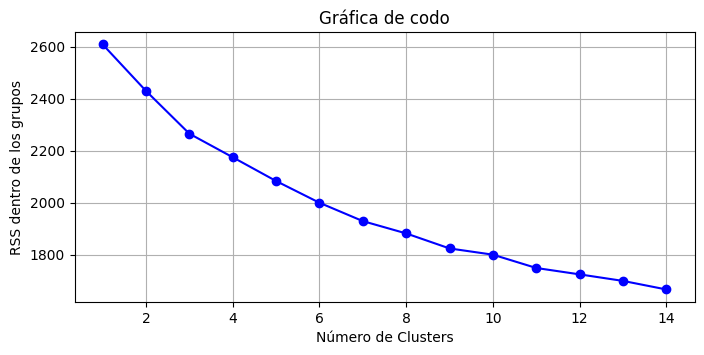

In [225]:
X_std = scaler.fit_transform(X)

Nc = range(1, 15)
kmeans = [KMeans(n_clusters=k, random_state=42).fit(X_std) for k in Nc]

# La suma de residuos cuadrados intra grupos de kMeans en sklearn se guarda en
# el atributo inertia
inertias = [model.inertia_ for model in kmeans]

plt.figure(figsize=(8, 3.5))
plt.plot(Nc,inertias, "bo-")
plt.xlabel('Número de Clusters')
plt.ylabel('RSS dentro de los grupos')
plt.title('Gráfica de codo')
plt.grid()
plt.show()

GAP

In [226]:
def calculate_intra_cluster_dispersion(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(X_std)
    return kmeans.inertia_

In [227]:
gaps = []
max_k = 10

# Calcula el Gap Statistic para determinar el número óptimo de clusters

for k in range(1, max_k + 1):
    # Calculo la inercia real sobre mis datos reales
    real_inertia = calculate_intra_cluster_dispersion(X_std, k)
    #Calculo la inercia de datos aleatorios con la misma estructura que mis datos originales
    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*X_std.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    #Aplico la funcion de gap
    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

#se selecciona el valor de k (número de clusters) que maximiza el Gap Statistic.
optimal_k = np.argmax(gaps) + 1

print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

Número óptimo de clusters según el Gap Statistic: 8


KMEANS de nuevo|

In [228]:
kmeans = KMeans(n_clusters=3, random_state=42,
                init='k-means++', n_init=5, algorithm='lloyd')
kmeans.fit(X_std) #Entrenamos el modelo
y_pred = kmeans.predict(X_std)

In [229]:
df_kmeans = pca_df.copy()

df_kmeans['Etiquetas KMeans'] = kmeans.labels_
df_kmeans['Etiquetas KMeans'] = df_kmeans['Etiquetas KMeans'].astype('category')
df_kmeans.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,tipoCultivo,Etiquetas KMeans
0,-0.068315,-0.430961,2.448585,0.453308,0.778546,-0.079128,-1.411301,0.213420,1.245448,0.277594,0.053400,1.255125,-0.947609,-0.145656,0.614417,-0.371073,Trigo,0
1,0.959151,0.744856,0.500574,-1.467113,1.723245,1.368822,0.272948,0.886305,1.089267,0.620799,-1.222328,-0.478189,0.494090,-0.876869,-0.194026,-1.174045,Maiz,0
2,1.174755,1.036803,-1.254872,-0.277938,0.499558,0.875947,0.908315,-0.935845,-0.641523,2.143201,0.111406,-1.156677,0.519555,-1.225925,0.222888,0.209024,Soja,0
3,-2.349818,-1.389282,-0.859643,-0.040962,-0.202887,-0.023863,-0.727274,1.701050,0.814356,-0.045609,0.134839,0.551898,-0.767000,0.610383,0.386530,0.399999,Trigo,1
4,0.977342,-1.927715,-0.310204,-1.930395,1.191368,-0.479648,0.720434,-0.087239,-0.419969,-0.951837,-0.567308,-1.108337,0.236096,0.616035,-0.269047,-0.592613,Soja,0


In [230]:
np.set_printoptions(precision=6)
kmeans.cluster_centers_
# caracteristicas normalizadas que tendria el centroide de ese cluster.

array([[ 0.337418,  0.18634 ,  0.214902,  0.346343, -0.10628 , -0.455907,
        -0.191899, -0.09025 ,  0.250853,  0.097794,  0.105493,  0.841309,
        -0.655317,  0.004524, -0.372378, -0.096371],
       [-0.413758, -0.148546, -0.286547, -0.260333,  0.006017,  0.340214,
         0.044088,  0.0514  ,  0.02381 , -0.04223 , -0.012463, -0.537871,
         0.406615,  0.473327, -0.684448, -0.026325],
       [ 0.180056, -0.016859,  0.148167, -0.054261,  0.124098,  0.075027,
         0.175745,  0.038048, -0.348199, -0.060817, -0.113738, -0.269278,
         0.227706, -0.694131,  1.461032,  0.158756]])

In [231]:
fig = px.scatter_3d(df_kmeans, x='PC1', y='PC2', z='PC3',
                    color='Etiquetas KMeans',
                    title='Dispersión de las variedades de trigo (K-means)')
fig.show()

## Clustering jerarquico

In [232]:
Z = linkage(X_std, "ward")

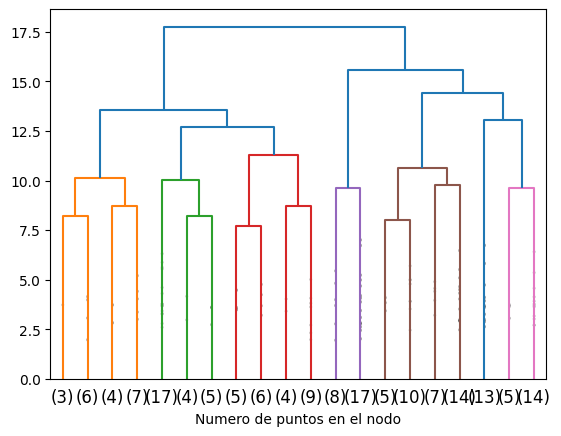

In [233]:
dendrogram(Z,  truncate_mode = 'lastp', p = 20, show_leaf_counts = True,
           show_contracted = True)
plt.axhline(y=110, c='k', linestyle='dashed')
plt.xlabel("Numero de puntos en el nodo")
plt.show()

In [234]:
distancias=[]
for i in range(1, 10):
    clustering = AgglomerativeClustering(n_clusters=i) # Aplica clustering jerárquico con i clusters
    clustering.fit(X_std)

    # Calcula la matriz de distancias por pares entre los puntos
    pairwise_distances = cdist(X_std, X_std, 'euclidean')

    # Calcula la distancia total dentro de los clusters
    distancia_total = 0
    for j in range(i):
        cluster_indices = np.where(clustering.labels_ == j)
        # Encuentra los índices de los puntos en el cluster j
        distancia_total += pairwise_distances[cluster_indices][:, cluster_indices].sum()
        # Suma las distancias dentro del cluster


    distancias.append(distancia_total)
    # Almacena la distancia total para el número de clusters i

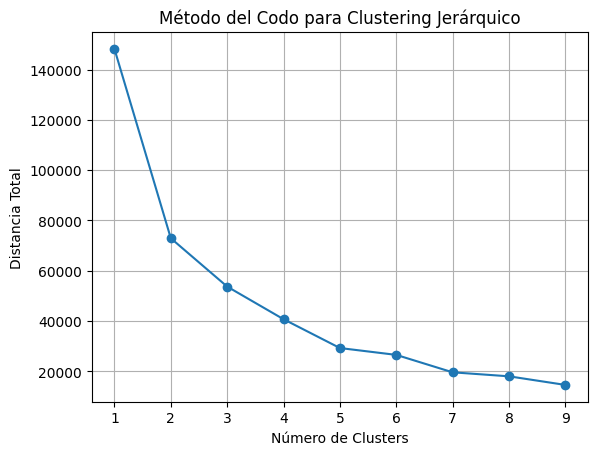

In [235]:
# Grafica la distancia total en función del número de clusters
plt.plot(range(1, 10), distancias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Distancia Total')
plt.title('Método del Codo para Clustering Jerárquico')
plt.grid()
plt.show()

In [237]:
n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_assignments = clustering.fit_predict(X_std) # Asigna los clusters a los datos

df_clustering = pca_df.copy()

df_clustering['Etiquetas jerarquico'] = cluster_assignments # Añade la columna con el cluster asignado a cada punto

df_clustering.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,tipoCultivo,Etiquetas jerarquico
0,-0.068315,-0.430961,2.448585,0.453308,0.778546,-0.079128,-1.411301,0.213420,1.245448,0.277594,0.053400,1.255125,-0.947609,-0.145656,0.614417,-0.371073,Trigo,0
1,0.959151,0.744856,0.500574,-1.467113,1.723245,1.368822,0.272948,0.886305,1.089267,0.620799,-1.222328,-0.478189,0.494090,-0.876869,-0.194026,-1.174045,Maiz,1
2,1.174755,1.036803,-1.254872,-0.277938,0.499558,0.875947,0.908315,-0.935845,-0.641523,2.143201,0.111406,-1.156677,0.519555,-1.225925,0.222888,0.209024,Soja,1
3,-2.349818,-1.389282,-0.859643,-0.040962,-0.202887,-0.023863,-0.727274,1.701050,0.814356,-0.045609,0.134839,0.551898,-0.767000,0.610383,0.386530,0.399999,Trigo,2
4,0.977342,-1.927715,-0.310204,-1.930395,1.191368,-0.479648,0.720434,-0.087239,-0.419969,-0.951837,-0.567308,-1.108337,0.236096,0.616035,-0.269047,-0.592613,Soja,0


In [241]:
fig = px.scatter_3d(df_clustering, x='PC1', y='PC2', z='PC3',
                    color='Etiquetas jerarquico',
                    title='Dispersión de las variedades de trigo (Clustering)')
fig.show()